In [34]:
# Import packages
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [57]:
#  Load in dataset
tweets = pd.read_csv('./Master_High_Centrality_Dataset.csv')
df = pd.DataFrame(tweets)
df

,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.statuses_count,user.url,user.verified,jd_sentiment,ah_sentiment,Johnny Depp sentiment,Amber Heard sentiment,Unnamed: 0,in_reply_to_username,like_count
0,1481747431066902528,2022-01-13 21:58:11+00:00,@IGN Amber heard killed this movie,en,1481702851575521280,1.892744e+07,[],NaN,[],[],...,5750.0,NaN,False,not mentioned,negative,NaN,NaN,NaN,NaN,NaN
1,1481747135674654720,2022-01-13 21:57:01+00:00,@IGN Nope. Anything with Amber Heard is a hard...,en,1481702851575521280,1.892744e+07,[],NaN,[],[],...,4332.0,NaN,False,not mentioned,negative,NaN,NaN,NaN,NaN,NaN
2,1482516759148220416,2022-01-16 00:55:13+00:00,Here is my latest appreciative tweet for one o...,en,1472990607610191872,7.937921e+17,"[{'indices': [146, 157], 'text': 'AmberHeard'}...","[{'original_info': {'width': 843, 'focus_rects...",[],[],...,105162.0,NaN,False,not mentioned,positive,NaN,NaN,NaN,NaN,NaN
3,1481764839861080064,2022-01-13 23:07:22+00:00,@IGN I feel bad for the other actors because a...,en,1481702851575521280,1.892744e+07,[],NaN,[],[],...,551.0,NaN,False,negative,negative,NaN,NaN,NaN,NaN,NaN
4,1481715466376826880,2022-01-13 19:51:10+00:00,@IGN Remove amber heard,en,1481702851575521280,1.892744e+07,[],NaN,[],[],...,12325.0,NaN,False,not mentioned,neutral,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,1557887999119183872,2022-08-12 00:33:37+00:00,@LawCrimeNetwork Damn another amber heard abus...,NaN,1557846831404572928,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,not mentioned,negative,64116.0,LawCrimeNetwork,12.0
9563,1557887477741912064,2022-08-12 00:31:33+00:00,@LawCrimeNetwork Amber Heard everyone- She was...,NaN,1557846831404572928,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,not mentioned,negative,64119.0,LawCrimeNetwork,21.0
9564,1557886914241303040,2022-08-12 00:29:19+00:00,@LawCrimeNetwork Amber Heard 2.0,NaN,1557846831404572928,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,not mentioned,neutral,64124.0,LawCrimeNetwork,3.0
9565,1557886463886340096,2022-08-12 00:27:31+00:00,"@LawCrimeNetwork Oh look, another #AmberHeard",NaN,1557846831404572928,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,not mentioned,not mentioned,64128.0,LawCrimeNetwork,30.0


In [58]:
# Get the username values and put into a list
user_nodes = df['user_name'].values.tolist()
user_nodes

['chrisllmao',
 'VincentLaGuard3',
 'TheTartanDalek',
 'sickboy155',
 'R24GAMES',
 'REALCOOLPEAK',
 'Epsilon356',
 'mr8747090',
 'IIJuggyII',
 'nomura115',
 'Cheesy_wiggle',
 'DragonWolfGhst',
 'BigMKFan2',
 'Estacy94',
 'IlpoSurokivi',
 'DevaMarie',
 'low2985',
 'ElisaDayJ4J',
 'centauri_27',
 'corey85264037',
 'Junior75373147',
 'josejuse',
 'HekateBlack',
 'lloydwambua',
 'Fido64261825',
 'TheTartanDalek',
 'TheTartanDalek',
 'TheTartanDalek',
 'TheTartanDalek',
 'Lepplady',
 'bounceintobed',
 'mexican_fifi',
 'heleneefraimsen',
 'Charlleyvent',
 'MauBoat',
 'Ioannalag1',
 'TheTartanDalek',
 'TheTartanDalek',
 'rosaoch89814746',
 'TheTartanDalek',
 'EwaStanska',
 'marccox70',
 'TheTartanDalek',
 'TheTartanDalek',
 'JCshow71',
 'hedgehogogg',
 'Cman__221',
 'Xennia79',
 'TheM0nke',
 'QuinnNoor',
 'ShooterKillerYT',
 'Abel_0888',
 'discipleofyb',
 'imedgarhi',
 'TwistingBrake34',
 'The_AsTroidmech',
 'michael_fudz410',
 'Shadow39312603',
 'BaxterEllisVA',
 'RodgersIsAGod',
 'SimpisGre

In [59]:
reply_user_nodes = df['in_reply_to_username'].values.tolist()
reply_user_nodes

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [74]:
# get the unique replied to usernames and put into a list
reply_user_nodes2 = df['in_reply_to_username'].dropna().values.tolist()
reply_user_nodes2 = set(reply_user_nodes2)

In [77]:
# Create the graph
G2 = nx.DiGraph()

In [78]:
# Create the nodes
G2.add_nodes_from(user_nodes)
G2.add_nodes_from(reply_user_nodes2)

In [79]:
# Create the list for edges (source and target)
edges2 = list(zip(user_nodes, reply_user_nodes2))
edges2

[('chrisllmao', 'TheeChristyD'),
 ('VincentLaGuard3', 'VidaKoster'),
 ('TheTartanDalek', 'Beetlepimp'),
 ('sickboy155', 'Edwardbozant3'),
 ('R24GAMES', 'TODAYshow'),
 ('REALCOOLPEAK', 'NicoOrdozgoiti'),
 ('Epsilon356', 'keekihimedesu'),
 ('mr8747090', 'loubieelou'),
 ('IIJuggyII', 'cnnbrk'),
 ('nomura115', 'ArixTavarus'),
 ('Cheesy_wiggle', 'daz_black'),
 ('DragonWolfGhst', 'Vasim_Jaman'),
 ('BigMKFan2', 'm_rodway'),
 ('Estacy94', 'redletterdave'),
 ('IlpoSurokivi', 'RebelDimond'),
 ('DevaMarie', '8etty8lack'),
 ('low2985', 'UnboxingCrypto'),
 ('ElisaDayJ4J', 'sxdleroy'),
 ('centauri_27', 'joshtpm'),
 ('corey85264037', 'laylaclare85'),
 ('Junior75373147', 'Eve_Barlow'),
 ('josejuse', 'macdaddyagain'),
 ('HekateBlack', 'John_Ogden'),
 ('lloydwambua', 'janssensnuf'),
 ('Fido64261825', 'CNN'),
 ('TheTartanDalek', 'storm_3113'),
 ('TheTartanDalek', 'joncoopertweets'),
 ('TheTartanDalek', 'ynnekinynabla'),
 ('TheTartanDalek', 'rdeppnext'),
 ('Lepplady', 'seamhain'),
 ('bounceintobed', 'wbpi

In [80]:
# Create the edges
G2.add_edges_from(edges2)

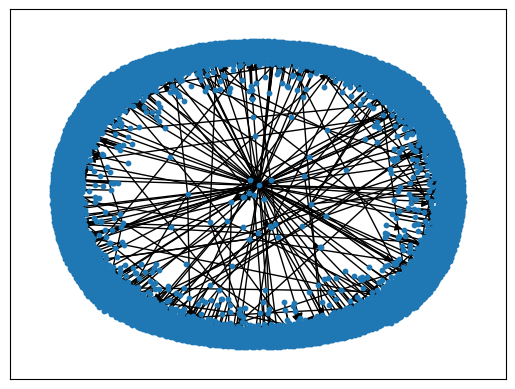

In [81]:
# Draw the network
nx.draw_networkx(G2, with_labels=False, font_size=3, node_size=10, arrows = True)

In [82]:
# calculate betweenness centrality
bet_centrality2 = nx.betweenness_centrality(G2, normalized = True)

In [83]:
bet_centrality2

{'chrisllmao': 0.0,
 'VincentLaGuard3': 0.0,
 'TheTartanDalek': 0.0,
 'sickboy155': 0.0,
 'R24GAMES': 0.0,
 'REALCOOLPEAK': 0.0,
 'Epsilon356': 0.0,
 'mr8747090': 0.0,
 'IIJuggyII': 0.0,
 'nomura115': 0.0,
 'Cheesy_wiggle': 0.0,
 'DragonWolfGhst': 0.0,
 'BigMKFan2': 0.0,
 'Estacy94': 0.0,
 'IlpoSurokivi': 0.0,
 'DevaMarie': 0.0,
 'low2985': 0.0,
 'ElisaDayJ4J': 0.0,
 'centauri_27': 0.0,
 'corey85264037': 0.0,
 'Junior75373147': 0.0,
 'josejuse': 0.0,
 'HekateBlack': 0.0,
 'lloydwambua': 0.0,
 'Fido64261825': 5.452631481756603e-08,
 'Lepplady': 0.0,
 'bounceintobed': 0.0,
 'mexican_fifi': 0.0,
 'heleneefraimsen': 0.0,
 'Charlleyvent': 0.0,
 'MauBoat': 0.0,
 'Ioannalag1': 0.0,
 'rosaoch89814746': 0.0,
 'EwaStanska': 0.0,
 'marccox70': 0.0,
 'JCshow71': 0.0,
 'hedgehogogg': 0.0,
 'Cman__221': 0.0,
 'Xennia79': 0.0,
 'TheM0nke': 0.0,
 'QuinnNoor': 0.0,
 'ShooterKillerYT': 0.0,
 'Abel_0888': 0.0,
 'discipleofyb': 0.0,
 'imedgarhi': 0.0,
 'TwistingBrake34': 0.0,
 'The_AsTroidmech': 0.0,
 'mi

In [84]:
# get the username with highest betweeness centrality
sort_bet_centrality2 = sorted(bet_centrality2.items(), key=lambda x: x[1], reverse=True)
sort_bet_centrality2

[('Fido64261825', 5.452631481756603e-08),
 ('Platoon19792', 5.452631481756603e-08),
 ('Jotan70', 3.635087654504402e-08),
 ('No_Reason_Jenz', 3.635087654504402e-08),
 ('kelseymb7590', 1.817543827252201e-08),
 ('Eskarina9', 1.817543827252201e-08),
 ('mg_violette', 1.817543827252201e-08),
 ('Izze1122', 1.817543827252201e-08),
 ('chrisllmao', 0.0),
 ('VincentLaGuard3', 0.0),
 ('TheTartanDalek', 0.0),
 ('sickboy155', 0.0),
 ('R24GAMES', 0.0),
 ('REALCOOLPEAK', 0.0),
 ('Epsilon356', 0.0),
 ('mr8747090', 0.0),
 ('IIJuggyII', 0.0),
 ('nomura115', 0.0),
 ('Cheesy_wiggle', 0.0),
 ('DragonWolfGhst', 0.0),
 ('BigMKFan2', 0.0),
 ('Estacy94', 0.0),
 ('IlpoSurokivi', 0.0),
 ('DevaMarie', 0.0),
 ('low2985', 0.0),
 ('ElisaDayJ4J', 0.0),
 ('centauri_27', 0.0),
 ('corey85264037', 0.0),
 ('Junior75373147', 0.0),
 ('josejuse', 0.0),
 ('HekateBlack', 0.0),
 ('lloydwambua', 0.0),
 ('Lepplady', 0.0),
 ('bounceintobed', 0.0),
 ('mexican_fifi', 0.0),
 ('heleneefraimsen', 0.0),
 ('Charlleyvent', 0.0),
 ('MauBoat